# Table of Contents
### 1.Preprocessing of KDD dataset
### 2.PCA
### 3.Pearson correlation
### 4.Variance inflation factor
### 5.Eigenvalues & Condition Index
### 6.Homogeneity Score
### 7.Balance check
### 8.Error analysis
### 9.Decision tree for error analysis
### 10.Adversarial Attack
### 11.Sensitivity Analysis
__________________________________

## imports

In [1]:
!pip install psynlig
!pip install scikit-plot
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from scikitplot.helpers import binary_ks_curve
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score, cohen_kappa_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import fbeta_score, matthews_corrcoef, average_precision_score
from sklearn.metrics import log_loss, brier_score_loss, top_k_accuracy_score
from sklearn.metrics import brier_score_loss, jaccard_score
from sklearn.decomposition import PCA
from psynlig import pca_residual_variance
from imblearn.over_sampling import SMOTE 
from sklearn.tree import DecisionTreeClassifier
from tabulate import tabulate
from sklearn.tree import export_graphviz
from scipy.stats import pearsonr
import graphviz
from sklearn import preprocessing
import statistics
import pickle
import warnings
warnings.filterwarnings('ignore')

### Data Adjustments on your data

In [ ]:
#import data
df = pd.read_csv(r"./your data",index_col=0).reset_index(drop=True)
pickle_in = open("model.pickle","rb")
#pickle_in is used for Sensitivity Analysis

#Reduce number of data
df = df.sample(n = 40000, random_state=31).reset_index(drop=True)
df_eigen = df_numeric.sample(n = 4000, random_state=31).reset_index(drop=True)
#df_eigen is used for Eigenvalues

#Numerical data
df_numeric = df._get_numeric_data()
column_list = df_numeric.columns.tolist()
#df_numeric is used for Eigenvalues & Condition Index, VIF

#Data frame without TARGET column
feat_df = df.drop(['target'], axis=1)
label_df = df.target
df1 = feat_df._get_numeric_data()
column_list = df1.columns.tolist()

#Data standardization
df_normalized = pd.DataFrame(preprocessing.scale(df1), columns = column_list)

#Median and mean
df_median = np.array(pd.DataFrame(df_normalized).median()).reshape(len(column_list),-1)
df_mean = np.array(pd.DataFrame(df_normalized).mean()).reshape(len(column_list),-1)

# convert categorical features to binary
obj_df = feat_df.select_dtypes(include=['object']).copy()
categorical_df = pd.DataFrame()
for c in range(len(obj_df.columns)) :
    col = obj_df.columns[c]
    cat_df = pd.get_dummies(feat_df[col]).reset_index(drop=True) 
    cat_df = cat_df.iloc[:, :-1]
    categorical_df = pd.concat([categorical_df, cat_df], axis=1)    
features_df = feat_df.drop(obj_df.columns, axis=1)
features_df = pd.concat([features_df, categorical_df], axis=1) 
col_name = features_df.columns
df2 = features_df.copy()
del categorical_df , obj_df

#df2 is used for Pearson correlation, Homogeneity Score

### normalizing
features_df = pd.DataFrame(scale(features_df))
features_df.columns = col_name
x_train, x_test, y_train, y_test = train_test_split(features_df, label_df, train_size = 0.7, random_state = 42)  
train_df = pd.concat([x_train, y_train], axis=1).reset_index(drop = True) 
test_df = pd.concat([x_test, y_test], axis=1).reset_index(drop = True)

## Data Adjustments

## preprocessing of KDD dataset

In [2]:
df = pd.read_csv(r"./kddcup99.csv",index_col=0).reset_index(drop=True)
df = df.sample(n = 40000, random_state=31).reset_index(drop=True)
np.random.seed(42)
# change of decision variable classes by tagging 0 for normal and 1 for fraud ----just for kdd----
df.loc[(df.label !="normal"),"target"] = 1
df.loc[(df.label =="normal"),"target"] = 0
df = df.drop(['label'], axis=1)
feat_df = df.drop(['target'], axis=1)
label_df = df.target

df1 = feat_df._get_numeric_data()
column_list = df1.columns.tolist()
df_numeric = df._get_numeric_data()
df_normalized = pd.DataFrame(preprocessing.scale(df1), columns = column_list)
df_median = np.array(pd.DataFrame(df_normalized).median()).reshape(len(column_list),-1)
df_mean = np.array(pd.DataFrame(df_normalized).mean()).reshape(len(column_list),-1)

# convert categorical features to binary
obj_df = feat_df.select_dtypes(include=['object']).copy()
categorical_df = pd.DataFrame()
for c in range(len(obj_df.columns)) :
    col = obj_df.columns[c]
    cat_df = pd.get_dummies(feat_df[col]).reset_index(drop=True) 
    cat_df = cat_df.iloc[:, :-1]
    categorical_df = pd.concat([categorical_df, cat_df], axis=1)    
features_df = feat_df.drop(obj_df.columns, axis=1)
features_df = pd.concat([features_df, categorical_df], axis=1) 
col_name = features_df.columns
df2 = features_df.copy()  
del categorical_df , obj_df
### normalizing
features_df = pd.DataFrame(scale(features_df))
features_df.columns = col_name
x_train, x_test, y_train, y_test = train_test_split(features_df, label_df, train_size = 0.7, random_state = 42)  
train_df = pd.concat([x_train, y_train], axis=1).reset_index(drop = True) 
test_df = pd.concat([x_test, y_test], axis=1).reset_index(drop = True)

## Residual variance -> Dimensionality Reduction with Principal Component Analysis

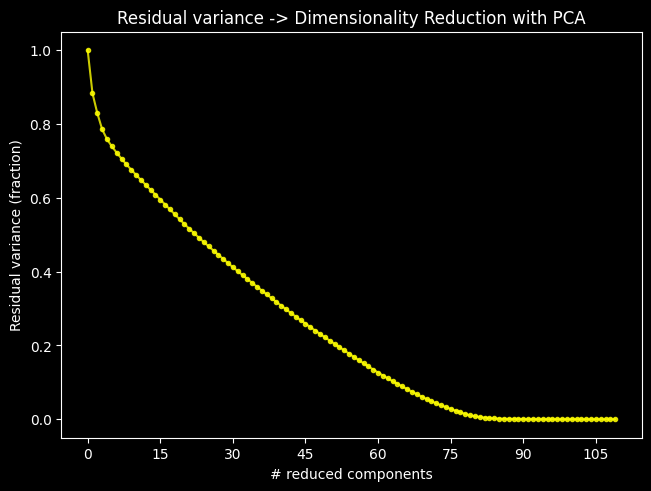

In [6]:
plt.style.use('dark_background')
pca = PCA()
pca.fit_transform(x_train)
pca_residual_variance(pca, marker='o', markersize=3, color = "yellow", alpha=0.8)
plt.xlabel("# reduced components")
plt.title("Residual variance -> Dimensionality Reduction with PCA")
plt.show()
plt.clf()

## Pearson correlation

Features that have Pearson correlation > 0.8

In [7]:
def pearson_correlation():
    for i in range(len(df2.columns)):
        for j in range (i+1,len(df2.columns)):
            crr1 = df2[df2.columns[i]].tolist()
            crr2 = df2[df2.columns[j]].tolist()
            corr, _ = pearsonr(crr1, crr2)
            corr = abs(corr)
            if corr>=0.8:
                yield df2.columns[i]
                yield df2.columns[j]
                yield corr
                
high_correlation = []
for x in pearson_correlation():
    high_correlation.append(x)
feature_1 = []
feature_2 = []
correlation_coefficient = []
for i in range(int(len(high_correlation)/3)):
    feature_1.append(high_correlation[i*3])
    feature_2.append(high_correlation[i*3+1])
    correlation_coefficient.append(high_correlation[i*3+2])
prs_corr = pd.DataFrame({'feature 1' : feature_1 , 'feature 2' : feature_2 ,
                         'pearson correlation coefficient' : correlation_coefficient})
prs_corr = prs_corr.sort_values(by=['pearson correlation coefficient'], ascending=False)
print("\n")
print("---------------------------------------- Pearson correlation ----------------------------------------")
print(tabulate(prs_corr, headers = 'keys', tablefmt = 'psql'))



---------------------------------------- Pearson correlation ----------------------------------------
+----+-----------------------------+-----------------------------+-----------------------------------+
|    | feature 1                   | feature 2                   |   pearson correlation coefficient |
|----+-----------------------------+-----------------------------+-----------------------------------|
| 22 | srv_serror_rate             | dst_host_srv_serror_rate    |                          0.999578 |
| 16 | serror_rate                 | dst_host_serror_rate        |                          0.999025 |
| 23 | srv_serror_rate             | S0                          |                          0.998764 |
| 53 | dst_host_srv_serror_rate    | S0                          |                          0.998549 |
| 50 | dst_host_serror_rate        | dst_host_srv_serror_rate    |                          0.998239 |
| 13 | serror_rate                 | srv_serror_rate             |      

## Variance inflation factor (VIF)

In [14]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#gather features
features = "+".join(column_list)
# get y and X dataframes based on this regression:
y, X = dmatrices('target ~' + features, df_numeric, return_type='dataframe')
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif = vif[['features','VIF Factor']].dropna()
print(tabulate(vif.round(1), headers = 'keys', tablefmt = 'psql'))

+----+-----------------------------+--------------+
|    | features                    |   VIF Factor |
|----+-----------------------------+--------------|
|  0 | Intercept                   |        243.5 |
|  1 | src_bytes                   |          1.1 |
|  2 | dst_bytes                   |          1   |
|  4 | wrong_fragment              |          1.2 |
|  6 | hot                         |          4.3 |
|  7 | num_failed_logins           |          1   |
|  8 | logged_in                   |          5.2 |
|  9 | lnum_compromised            |          1.2 |
| 10 | lroot_shell                 |          1   |
| 12 | lnum_root                   |          1   |
| 13 | lnum_file_creations         |          1   |
| 15 | lnum_access_files           |          1   |
| 18 | is_guest_login              |          4.3 |
| 19 | count                       |         42.7 |
| 20 | srv_count                   |         96   |
| 21 | serror_rate                 |        849.7 |
| 22 | srv_s

## Eigenvalues & Condition Index

In [23]:
import patsy 
eigen_vals_list = []
for i in range (len(column_list)): 
    x = np.asarray(patsy.dmatrix(f"{column_list[i]} + C(target)", data = df_eigen))
    _, sing_as, _ = np.linalg.svd(x)
    sing_as = sing_as.tolist()
    eigen_vals_list.append(sing_as)
eigen_vals_list = np.array(eigen_vals_list)

In [24]:
eigen_vals_columns = [ '0' , '1' , '2']
eigen_vals_index = column_list
eigen_vals = pd.DataFrame(data = eigen_vals_list , index = eigen_vals_index , columns = eigen_vals_columns)
print("------------------------------EigenValues------------------------------")
print(tabulate(eigen_vals, headers = 'keys', tablefmt = 'psql'))

------------------------------EigenValues------------------------------
+-----------------------------+------------------+---------+-----------+
|                             |                0 |       1 |         2 |
|-----------------------------+------------------+---------+-----------|
| src_bytes                   |      5.14049e+06 | 82.6485 | 19.278    |
| dst_bytes                   | 759578           | 82.6012 | 19.0579   |
| land                        |     82.6822      | 19.2783 |  0        |
| wrong_fragment              |     82.684       | 19.279  |  9.57444  |
| urgent                      |     82.6822      | 19.2783 |  0        |
| hot                         |     82.7386      | 50.5042 | 19.2781   |
| num_failed_logins           |     82.6822      | 19.2783 |  0.999844 |
| logged_in                   |     82.9082      | 29.4463 |  9.0076   |
| lnum_compromised            |     82.6831      | 19.2785 |  4.67419  |
| lroot_shell                 |     82.6822      | 1

In [25]:
import math
condition_index = eigen_vals
for i in eigen_vals_columns:
    max_eigen = eigen_vals[i].max()
    condition_index[i] = (max_eigen/eigen_vals[i])**(1/2)
print("-------------------------Condition Index-------------------------")
print(tabulate(condition_index, headers = 'keys', tablefmt = 'psql'))

-----------------------Condition Index-----------------------
+-----------------------------+-----------+---------+-----------+
|                             |         0 |       1 |         2 |
|-----------------------------+-----------+---------+-----------|
| src_bytes                   |   1       | 1       |   1       |
| dst_bytes                   |   2.60145 | 1.00029 |   1.00576 |
| land                        | 249.342   | 2.07054 | inf       |
| wrong_fragment              | 249.34    | 2.0705  |   1.41898 |
| urgent                      | 249.342   | 2.07054 | inf       |
| hot                         | 249.257   | 1.27925 |   1       |
| num_failed_logins           | 249.342   | 2.07054 |   4.39103 |
| logged_in                   | 249.002   | 1.67534 |   1.46294 |
| lnum_compromised            | 249.341   | 2.07053 |   2.03086 |
| lroot_shell                 | 249.342   | 2.07054 | inf       |
| lsu_attempted               | 249.342   | 2.07054 | inf       |
| lnum_root   

## Homogeneity Score

Features that have Homogeneity Score > 0.9

In [26]:
from sklearn.metrics.cluster import homogeneity_score
from tabulate import tabulate
def homogeneity():
    for i in range(len(df2.columns)):
        for j in range (i+1,len(df2.columns)):
            crr1 = df2[df2.columns[i]].tolist()
            crr2 = df2[df2.columns[j]].tolist()
            corr = homogeneity_score(crr1, crr2)
            corr = abs(corr)
            if corr>=0.9:
                yield df2.columns[i]
                yield df2.columns[j]
                yield corr
                
high_correlation = []
for x in homogeneity():
    high_correlation.append(x)
feature_1 = []
feature_2 = []
correlation_coefficient = []
for i in range(int(len(high_correlation)/3)):
    feature_1.append(high_correlation[i*3])
    feature_2.append(high_correlation[i*3+1])
    correlation_coefficient.append(high_correlation[i*3+2])
homogeneity_corr = pd.DataFrame({'feature 1' : feature_1 , 'feature 2' : feature_2 ,
                         'homogeneity correlation coefficient' : correlation_coefficient})
homogeneity_corr = homogeneity_corr.sort_values(by=['homogeneity correlation coefficient'], ascending=False).reset_index(drop=True)
print("\n")
print("---------------------------------------- Homogeneity Correlation ----------------------------------------")
print(tabulate(homogeneity_corr, headers = 'keys', tablefmt = 'psql'))



---------------------------------------- Homogeneity Correlation ----------------------------------------
+-----+--------------------+-----------------------------+---------------------------------------+
|     | feature 1          | feature 2                   |   homogeneity correlation coefficient |
|-----+--------------------+-----------------------------+---------------------------------------|
|   0 | land               | wrong_fragment              |                              1        |
|   1 | lnum_outbound_cmds | count                       |                              1        |
|   2 | lnum_shells        | time                        |                              1        |
|   3 | lnum_shells        | urh_i                       |                              1        |
|   4 | lnum_shells        | urp_i                       |                              1        |
|   5 | lnum_shells        | uucp                        |                              1        |
|

## Balance check

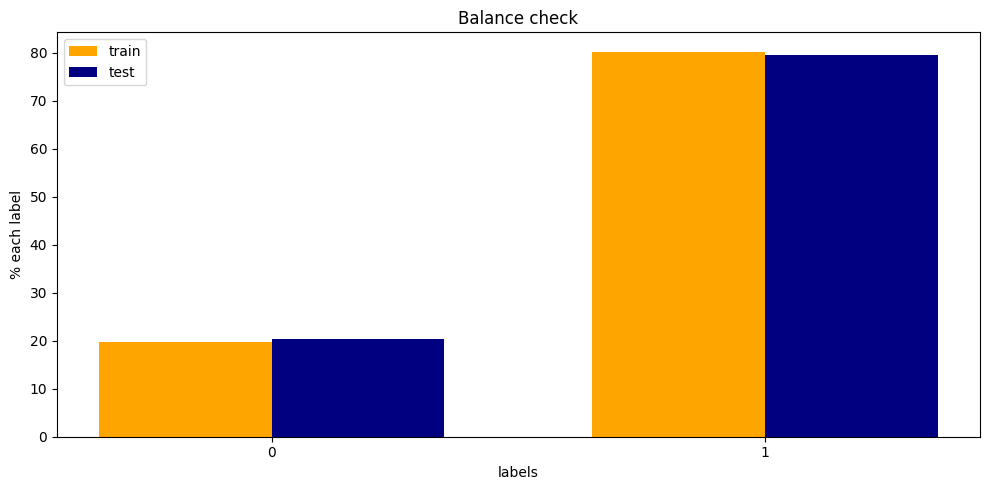



+----+---------+---------+
|    |   train |    test |
|----+---------+---------|
|  0 | 19.7214 | 20.3917 |
|  1 | 80.2786 | 79.6083 |
+----+---------+---------+


In [5]:
train_frauds = (sum(train_df.target)/len(train_df))*100
train_norms = 100 - train_frauds
test_frauds = (sum(test_df.target)/len(test_df))*100
test_norms = 100 - test_frauds
train_per = (train_norms, train_frauds)
test_per = (test_norms, test_frauds)
fig, ax = plt.subplots(figsize = (10, 5))
index = np.arange(2)
bar_width = 0.35
rects1 = plt.bar(index, train_per, bar_width, color='orange', label='train')
rects2 = plt.bar(index + bar_width, test_per, bar_width, color='navy',label='test')
plt.xlabel('labels')
plt.ylabel('% each label')
plt.title('Balance check')
plt.xticks(index + 0.5*bar_width, ('0', '1'))
plt.legend()
plt.tight_layout()
plt.show()
tr_ts_df = pd.DataFrame({'train' : train_per, 'test' : test_per})
print("\n")
print(tabulate(tr_ts_df, headers = 'keys', tablefmt = 'psql'))

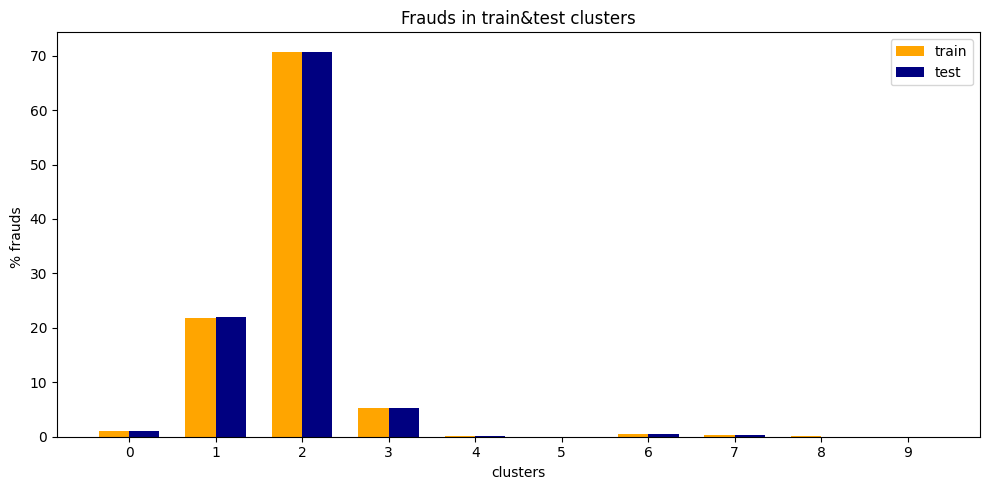

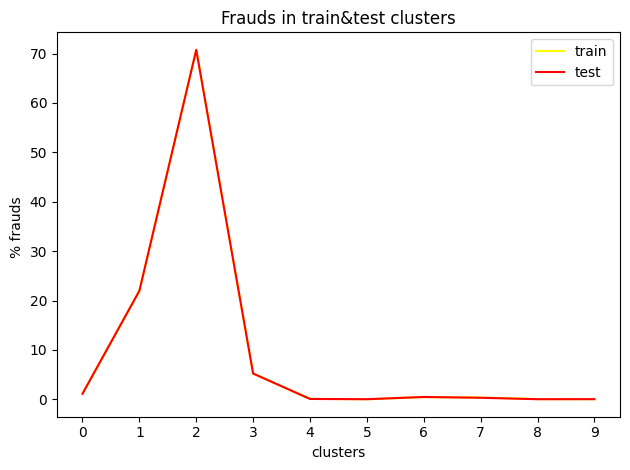



+----+------------------+----------------+
|    |   % train_frauds |   %test_frauds |
|----+------------------+----------------|
|  0 |        1.13444   |      1.13053   |
|  1 |       21.8881    |     21.9722    |
|  2 |       70.7536    |     70.7526    |
|  3 |        5.23178   |      5.21302   |
|  4 |        0.0978735 |      0.0732754 |
|  5 |        0.0133464 |      0.0209358 |
|  6 |        0.444879  |      0.471056  |
|  7 |        0.364801  |      0.314037  |
|  8 |        0.0444879 |      0.0209358 |
|  9 |        0.0266928 |      0.0314037 |
+----+------------------+----------------+


In [7]:
x_all = pd.concat([x_train, x_test], axis=0).reset_index(drop = True)
cluster = 10
data = np.array(x_all).reshape(-1, x_all.shape[1])
km = KMeans(n_clusters = 10, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
x_all['cluster_group'] = km.fit_predict(data).tolist()
train_df['cluster_group'] = x_all['cluster_group'][:len(x_train)].reset_index(drop = True)
test_df['cluster_group'] = x_all['cluster_group'][len(x_train):].reset_index(drop = True)
train_fraud = []
test_fraud = []
for i in range(cluster):
    df_1 = train_df[train_df['cluster_group']==i]
    train_fraud.append(100*sum(df_1.target)/sum(train_df.target))
for i in range(cluster):
    df_1 = test_df[test_df['cluster_group']==i]
    test_fraud.append(100*sum(df_1.target)/sum(test_df.target))
fig, ax = plt.subplots(figsize = (10, 5))
index = np.arange(10)
bar_width = 0.35
rects1 = plt.bar(index, train_fraud, bar_width, color='orange', label='train')
rects2 = plt.bar(index + bar_width, test_fraud, bar_width, color='navy',label='test')
plt.xlabel('clusters')
plt.ylabel('% frauds ')
plt.title('Frauds in train&test clusters')
plt.xticks(index + 0.5*bar_width, ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9'))
plt.legend()
plt.tight_layout()
plt.show()
plt.clf()
print("\n")
plt.plot(index, train_fraud, color = "yellow", label='train')
plt.plot(index, test_fraud, color = "red", label='test')
plt.xlabel('clusters')
plt.ylabel('% frauds ')
plt.title('Frauds in train&test clusters')
plt.xticks(index , ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9'))
plt.legend()
plt.tight_layout()
plt.show()

tr_ts_df2 = pd.DataFrame({'% train_frauds' : train_fraud, '%test_frauds' : test_fraud})
print("\n")
print(tabulate(tr_ts_df2, headers = 'keys', tablefmt = 'psql'))

## Error analysis

unsupervised anomaly detection model : One-Class Support Vector Machines

### train step

In [8]:
# confusion matrix
np.random.seed(31)
svm_model = svm.OneClassSVM()
svm_model.fit(x_train)
svm_pred = svm_model.predict(x_train)
svm_pred = pd.Series(svm_pred).replace([-1,1],[1,0])
svm_conf_mat = pd.DataFrame(confusion_matrix(y_train, svm_pred))

In [24]:
index = []
test_score = [] 
tn, fp, fn, tp = confusion_matrix(y_train, svm_pred).ravel()
index.append("accuracy")
test_score.append((tp + tn) / (tp + fp + fn + tn))
index.append("recall_score")
test_score.append(recall_score(y_train, svm_pred)) 
index.append("precision_score")
test_score.append(precision_score(y_train, svm_pred))
index.append("f1_score")
test_score.append(f1_score(y_train, svm_pred)) 
index.append("f2_score")
test_score.append(fbeta_score(y_train, svm_pred, beta = 2))
index.append("cohen_kappa_score")
test_score.append(cohen_kappa_score(y_train, svm_pred))
index.append("roc_auccuracy_score")
test_score.append(roc_auc_score(y_train, svm_pred))
index.append("false_positive_rate")
test_score.append(fp / (fp + tn))
index.append("false_negative_rate")
test_score.append(fn / (tp + fn))
index.append("true_negative_rate")
test_score.append(tn / (tn + fp))
index.append("negative_predictive_value")
test_score.append(tn/ (tn + fn))
index.append("false_discovery_rate")
test_score.append(fp/ (tp + fp))
index.append("matthews_corr")
test_score.append(matthews_corrcoef(y_train, svm_pred))
index.append("avg_precision")
test_score.append(average_precision_score(y_train, svm_pred))
index.append("log_loss")
test_score.append(log_loss(y_train, svm_pred))
index.append("brier_score_loss")
test_score.append(brier_score_loss(y_train, svm_pred))
index.append("binary_ks_curve")
res = binary_ks_curve(y_train, svm_pred)
test_score.append(res[3])
from sklearn.metrics import balanced_accuracy_score
index.append("balanced_accuracy_score")
test_score.append(balanced_accuracy_score(y_train, svm_pred))
index.append("top_k_accuracy_score")
test_score.append(top_k_accuracy_score(y_train, svm_pred, k=2))
index.append("brier_score_loss")
test_score.append(brier_score_loss(y_train, svm_pred))
index.append("jaccard_score")
test_score.append(jaccard_score(y_train, svm_pred))
score_df1 = pd.DataFrame({"index":index ,"score" :test_score })
y_df_train = pd.DataFrame(y_train).reset_index(drop = True)
y_df_train['pred_label'] = svm_pred
clusters = train_df.cluster_group.reset_index()
y_df_train['cluster_group'] = clusters.cluster_group
per_error_train = []
for j in range(cluster):
    df = y_df_train[y_df_train.cluster_group == j]
    fr_df = df[df.target == 1]
    real = max(len(fr_df.target) , 1)
    err = len(fr_df[fr_df.pred_label == 0])
    per_error_train.append(100*err/real)

### test step

In [10]:
# confusion matrix
svm_pred_test = svm_model.predict(x_test)
svm_pred_test = pd.Series(svm_pred_test).replace([-1,1],[1,0])
svm_conf_mat_test = pd.DataFrame(confusion_matrix(y_test, svm_pred_test))

In [11]:
index = []
test_score = [] 
tn, fp, fn, tp = confusion_matrix(y_test, svm_pred_test).ravel()
index.append("accuracy")
test_score.append((tp + tn) / (tp + fp + fn + tn))
index.append("recall_score")
test_score.append(recall_score(y_test, svm_pred_test)) 
index.append("precision_score")
test_score.append(precision_score(y_test, svm_pred_test))
index.append("f1_score")
test_score.append(f1_score(y_test, svm_pred_test)) 
index.append("f2_score")
test_score.append(fbeta_score(y_test, svm_pred_test, beta = 2))
index.append("cohen_kappa_score")
test_score.append(cohen_kappa_score(y_test, svm_pred_test))
index.append("roc_auccuracy_score")
test_score.append(roc_auc_score(y_test, svm_pred_test))
index.append("false_positive_rate")
test_score.append(fp / (fp + tn))
index.append("false_negative_rate")
test_score.append(fn / (tp + fn))
index.append("true_negative_rate")
test_score.append(tn / (tn + fp))
index.append("negative_predictive_value")
test_score.append(tn/ (tn + fn))
index.append("false_discovery_rate")
test_score.append(fp/ (tp + fp))
index.append("matthews_corr")
test_score.append(matthews_corrcoef(y_test, svm_pred_test))
index.append("avg_precision")
test_score.append(average_precision_score(y_test, svm_pred_test))
index.append("log_loss")
test_score.append(log_loss(y_test, svm_pred_test))
index.append("brier_score_loss")
test_score.append(brier_score_loss(y_test, svm_pred_test))
index.append("binary_ks_curve")
res = binary_ks_curve(y_test, svm_pred_test)
test_score.append(res[3])
from sklearn.metrics import balanced_accuracy_score
index.append("balanced_accuracy_score")
test_score.append(balanced_accuracy_score(y_test, svm_pred_test))
index.append("top_k_accuracy_score")
test_score.append(top_k_accuracy_score(y_test, svm_pred_test, k=2))
index.append("brier_score_loss")
test_score.append(brier_score_loss(y_test, svm_pred_test))
index.append("jaccard_score")
test_score.append(jaccard_score(y_test, svm_pred_test))
score_df2 = pd.DataFrame({"index":index ,"score" :test_score })
y_df_test = pd.DataFrame(y_test).reset_index(drop = True)
y_df_test['pred_label'] = svm_pred_test
clusters = test_df.cluster_group.reset_index()
y_df_test['cluster_group'] = clusters.cluster_group
per_error_tset = []
for j in range(cluster):
    df = y_df_test[y_df_test.cluster_group == j]
    fr_df = df[df.target == 1]
    real = max(len(fr_df.target) , 1)
    err = len(fr_df[fr_df.pred_label == 0])
    per_error_tset.append(100*err/real)

In [21]:
from IPython.display import display_html 

print('---- confusion matrix ----')
svm_conf_mat_test_1 = svm_conf_mat_test.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("test")
svm_conf_mat_1 = svm_conf_mat.style.set_table_attributes("style='display:inline'").set_caption("train")

display_html(svm_conf_mat_1._repr_html_() + svm_conf_mat_test_1._repr_html_(), raw=True)

---- confusion matrix ----


,0,1
0,790,4732
1,3546,18932
,0,1
0,353,2094
1,1445,8108


In [28]:
### summary scores in dataframe 
print('--------------------------- scores -----------------------------')

score_df_test = score_df2.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("test")
score_df_train = score_df1.style.set_table_attributes("style='display:inline'").set_caption("train")

display_html(score_df_train._repr_html_() + score_df_test._repr_html_(), raw=True)

--------------------------- scores -----------------------------


,index,score
0,accuracy,0.704357
1,recall_score,0.842246
2,precision_score,0.800034
3,f1_score,0.820597
4,f2_score,0.833451
5,cohen_kappa_score,-0.015985
6,roc_auccuracy_score,0.492655
7,false_positive_rate,0.856936
8,false_negative_rate,0.157754
9,true_negative_rate,0.143064


Display "% False Negative /  all_real_fraud" in each *cluster*

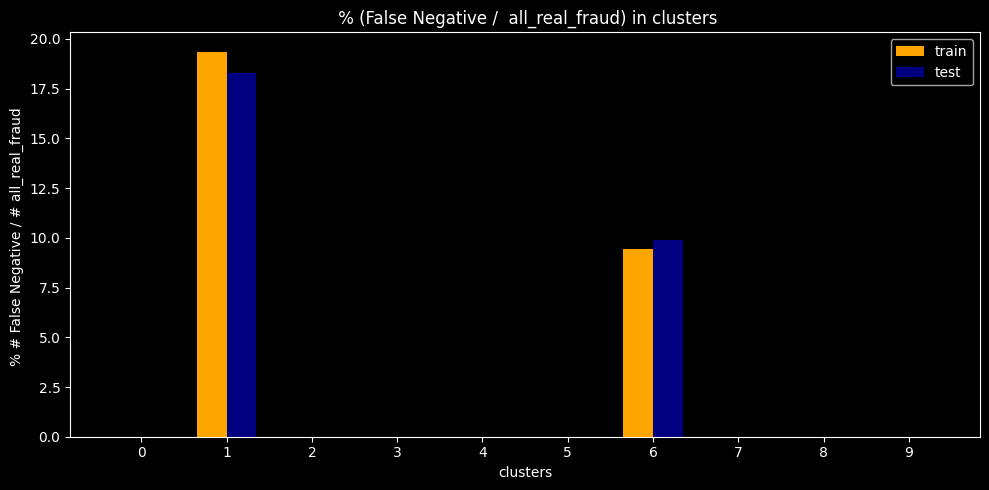



+----+----------+----------+
|    |    train |     test |
|----+----------+----------|
|  0 |  0       |  0       |
|  1 | 19.365   | 18.2961  |
|  2 |  0       |  0       |
|  3 |  0       |  0       |
|  4 |  0       |  0       |
|  5 |  0       |  0       |
|  6 |  9.43702 |  9.87654 |
|  7 |  0       |  0       |
|  8 |  0       |  0       |
|  9 |  0       |  0       |
+----+----------+----------+


In [24]:
fig, ax = plt.subplots(figsize = (10, 5))
index = np.arange(10)
bar_width = 0.35
rects1 = plt.bar(index, per_error_train, bar_width, color='orange', label='train')
rects2 = plt.bar(index + bar_width, per_error_tset, bar_width, color='navy',label='test')
plt.xlabel('clusters')
plt.ylabel('% # False Negative / # all_real_fraud ')
plt.title(' % (False Negative /  all_real_fraud) in clusters')
plt.xticks(index + 0.5*bar_width, ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9'))
plt.legend()
plt.tight_layout()
plt.show()
print("\n")
df_fn = pd.DataFrame({'train' : per_error_train, 'test' : per_error_tset})
print(tabulate(df_fn, headers = 'keys', tablefmt = 'psql'))

## Decision tree for error analysis

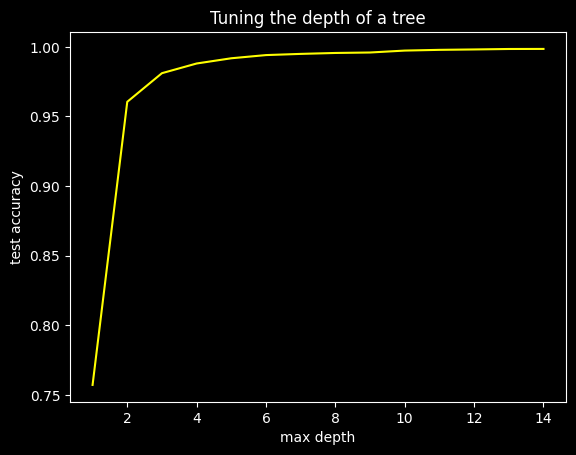



------- Tuned model scores : -------
Training set accuracy: 0.994
Test set accuracy: 0.994
------------------------------------

------------ Feature Importance ------------
+----+------------------------+--------------+
|    | feature                |   importance |
|----+------------------------+--------------|
| 19 | srv_count              |        0.877 |
| 18 | count                  |        0.075 |
| 24 | same_srv_rate          |        0.027 |
| 35 | dst_host_rerror_rate   |        0.008 |
| 29 | dst_host_same_srv_rate |        0.005 |
| 30 | dst_host_diff_srv_rate |        0.004 |
| 52 | ecr_i                  |        0.002 |
| 20 | serror_rate            |        0.002 |
| 63 | iso_tsap               |        0     |
| 82 | printer                |        0     |
| 81 | pop_3                  |        0     |
| 61 | http_443               |        0     |
| 80 | pop_2                  |        0     |
| 79 | pm_dump                |        0     |
| 62 | imap4             

In [25]:
train_df =  pd.concat([x_train.reset_index(drop =True), y_train.reset_index(drop =True)], axis=1)
svm_df_train = pd.DataFrame(svm_pred, columns = ['pred_label']).reset_index(drop =True)
train_df = pd.concat([train_df, svm_df_train], axis=1)
test_df =  pd.concat([x_test.reset_index(drop =True), y_test.reset_index(drop =True)], axis=1)
svm_df_test = pd.DataFrame(svm_pred_test, columns = ['pred_label']).reset_index(drop =True)
test_df = pd.concat([test_df, svm_df_test], axis=1)
new_df = pd.concat([train_df, test_df], axis=0).reset_index(drop =True)
new_df['fn_error'] = None
for r in range(len(new_df)) :
    if ((new_df.target[r] == 1) and (new_df.pred_label[r] == 0)) :
        new_df.fn_error[r] = 1
    else :
        new_df.fn_error[r] = 0
dt_df = new_df.drop(['target', 'pred_label'], axis=1)
### 
x_new = dt_df.drop(['fn_error'], axis=1)
y_new = dt_df.fn_error.astype('int')
sm = SMOTE(random_state=42)
x_blnc, y_blnc = sm.fit_resample(x_new, y_new)
x_train_dt, x_test_dt, y_train_dt, y_test_dt = train_test_split(x_blnc, y_blnc, train_size = 0.7, random_state = 42)
# List of values to try for max_depth:
max_depth_range = list(range(1, 15))
# List to store the accuracy for each value of max_depth:
test_accuracy = []
for depth in max_depth_range:
    
    dt_clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    dt_clf.fit(x_train_dt, y_train_dt)
    score = dt_clf.score(x_test_dt, y_test_dt)
    test_accuracy.append(score)

fig = plt.figure()
ax = plt.axes()
plt.plot(max_depth_range, test_accuracy, color = "yellow")
plt.xlabel("max depth")
plt.ylabel("test accuracy")
plt.title("Tuning the depth of a tree")
plt.show()
dt_clf = DecisionTreeClassifier(max_depth = 6, random_state = 0)
dt_clf.fit(x_train_dt, y_train_dt)
print("\n")
print("------- Tuned model scores : -------")
print("Training set accuracy: {:.3f}".format(dt_clf.score(x_train_dt, y_train_dt)))
print("Test set accuracy: {:.3f}".format(dt_clf.score(x_test_dt, y_test_dt)))
print("------------------------------------\n")
print("------------ Feature Importance ------------")
importances = pd.DataFrame({'feature':x_train_dt.columns,'importance':np.round(dt_clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
print(tabulate(importances.iloc[:15, :], headers = 'keys', tablefmt = 'psql'))


In [ ]:
### show the tree
export_graphviz(dt_clf,out_file="tree.dot")
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [78]:
import sklearn
def tree_to_df(reg_tree, feature_names):
    tree_ = reg_tree.tree_
    feature_name = [
        feature_names[i] if i != sklearn.tree._tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    
    def recurse(node, row, ret):
        if tree_.feature[node] != sklearn.tree._tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            # Add rule to row and search left branch
            row[-1].append(name + " <= " +  str(round(threshold,3)))
            recurse(tree_.children_left[node], row, ret)
            # Add rule to row and search right branch
            row[-1].append(name + " > " +  str(round(threshold,3)))
            recurse(tree_.children_right[node], row, ret)
        else:
            # Add output rules and start a new row
            label = tree_.value[node]
            ret.append("Value: [" + str(label[0][0]) + ',' + str(label[0][1]) + "]")
            row.append([])
    
    # Initialize
    rules = [[]]
    vals = []
    
    # Call recursive function with initial values
    recurse(0, rules, vals)
    
    # Convert to table and output
    df_tree = pd.DataFrame(rules).dropna(how='all')
    df_tree['Return'] = pd.Series(vals)
    columns = []
    for i in range(6):
        columns.append(f"Depth {i}")
    columns.append('Values')
    df_tree.columns = columns
    return df_tree

tree_to_df(dt_clf , df2.columns.tolist())

,Depth 0,Depth 1,Depth 2,Depth 3,Depth 4,Depth 5,Values
0,srv_count <= 0.889,srv_count <= -1.115,srv_count <= -1.119,srv_count <= -1.127,srv_count <= -1.143,dst_host_same_src_port_rate <= 0.819,"Value: [6666.0,1.0]"
1,dst_host_same_src_port_rate > 0.819,None,None,None,None,None,"Value: [424.0,3.0]"
2,srv_count > -1.143,srv_count <= -1.14,None,None,None,None,"Value: [0.0,2.0]"
3,srv_count > -1.14,None,None,None,None,None,"Value: [1670.0,10.0]"
4,srv_count > -1.127,srv_count <= -1.123,None,None,None,None,"Value: [0.0,9.0]"
5,srv_count > -1.123,dst_host_srv_count <= -1.624,None,None,None,None,"Value: [559.0,0.0]"
6,dst_host_srv_count > -1.624,None,None,None,None,None,"Value: [188.0,12.0]"
7,srv_count > -1.119,count <= -0.624,serror_rate <= 0.918,None,None,None,"Value: [104.0,0.0]"
8,serror_rate > 0.918,dst_host_diff_srv_rate <= 0.215,None,None,None,None,"Value: [1.0,94.0]"
9,dst_host_diff_srv_rate > 0.215,None,None,None,None,None,"Value: [75.0,37.0]"


## Adversarial Attack

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Import library

In [2]:
import tensorflow.compat.v1 as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import pandas as pd
import numpy as np
from keras.utils import np_utils
from cleverhans.future.tf2.attacks import fast_gradient_method,basic_iterative_method
from sklearn.datasets import fetch_kddcup99

In [13]:
df = pd.read_csv(r"./kddcup99.csv",index_col=0).reset_index(drop=True)
COL_NAME = df.columns.tolist()
COL_NAME.insert(0, "duration")
COL_NAME.remove('label')
df_numeric = df._get_numeric_data()
NUMERIC_COLS = df_numeric.columns.tolist()
NUMERIC_COLS.insert(0, "duration")

def get_ds():
    """ get_ds: Get the numeric values of the KDDCUP'99 dataset. """
    x_kddcup, y_kddcup = fetch_kddcup99(return_X_y=True, shuffle=False)
    df_kddcup = pd.DataFrame(x_kddcup, columns=COL_NAME)
    df_kddcup['label'] = y_kddcup
    df_kddcup.drop_duplicates(keep='first', inplace=True)
    df_kddcup['label'] = df_kddcup['label'].apply(lambda d: \
                                    str(d).replace('.', '').replace("b'", "").\
                                        replace("'", ""))
    

    conversion_dict = {'back':'r2l', 'buffer_overflow':'u2r', 'ftp_write':'r2l',
                       'guess_passwd':'r2l', 'imap':'r2l', 'ipsweep':'r2l',
                       'land':'r2l', 'loadmodule':'u2r', 'multihop':'r2l',
                       'neptune':'r2l', 'nmap':'r2l', 'perl':'u2r', 'phf':'r2l',
                       'pod':'r2l', 'portsweep':'r2l', 'rootkit':'u2r',
                       'satan':'r2l', 'smurf':'r2l', 'spy':'r2l', 'teardrop':'r2l',
                       'warezclient':'r2l', 'warezmaster':'r2l'}
    df_kddcup['label'] = df_kddcup['label'].replace(conversion_dict)
    df_kddcup = df_kddcup.query("label != 'u2r'")
    df_y = pd.DataFrame(df_kddcup.label, columns=["label"], dtype="category")
    df_kddcup.drop(["label"], inplace=True, axis=1)
    x_kddcup = df_kddcup[NUMERIC_COLS].values
    x_kddcup = preprocessing.scale(x_kddcup)
    y_kddcup = df_y.label.cat.codes.to_numpy()
    return x_kddcup, y_kddcup

The tensorflow based classification model is then given for example as exercise here:

In [4]:
def create_tf_model(input_size, num_of_class):
    """ This method creates the tensorflow classification model """
    model_kddcup = tf.keras.Sequential([
        tf.keras.layers.Dense(200, input_dim=input_size, activation=tf.nn.relu),
        tf.keras.layers.Dense(500, activation=tf.nn.relu),
        tf.keras.layers.Dense(200, activation=tf.nn.relu),
        tf.keras.layers.Dense(num_of_class),
        # We seperate the activation layer to be able to access
        # the logits of the previous layer later
        tf.keras.layers.Activation(tf.nn.softmax)
        ])
    model_kddcup.compile(loss='categorical_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])
    return model_kddcup

The next step is to create adversarial machine learning attacks using CleverHans library. we used fast-gradient sign method (FGSM) and basic iterative method (BIM) attacks for the Tensorflow library.

In [5]:
def gen_tf2_fgsm_attack(org_model, x_test):
    """ This method creates adversarial examples with fgsm """
    logits_model = tf.keras.Model(org_model.input, model.layers[-1].output)

    epsilon = 0.1
    adv_fgsm_x = fast_gradient_method(logits_model,
                                      x_test,
                                      epsilon,
                                      np.inf,
                                      targeted=False)
    return adv_fgsm_x

def gen_tf2_bim(org_model, x_test):
    """ This method creates adversarial examples with bim """
    logits_model = tf.keras.Model(org_model.input, model.layers[-1].output)

    epsilon = 0.1
    adv_bim_x = basic_iterative_method(logits_model,
                                       x_test,
                                       epsilon,
                                       0.1,
                                       nb_iter=10,
                                       norm=np.inf,
                                       targeted=True)
    return adv_bim_x

Let’s continue with the training of the attack detection model with the normal KDDCUP’99 dataset

#### Original Model’s Confusion Matrix
The original model’s confusion matrix is shown here. According to the confusion matrix, the model’s classification performance quite good.

In [40]:
EPOCH = 50
TEST_RATE = 0.2
VALIDATION_RATE = 0.2

X, y = get_ds()

num_class = len(np.unique(y))

attack_functions = [gen_tf2_bim,
                    gen_tf2_fgsm_attack]

model = create_tf_model(X.shape[1], num_class)

X_train, X_test, y_train, y_test = train_test_split(X, y, \
                                                    test_size=TEST_RATE)
y_train_cat = np_utils.to_categorical(y_train)
y_test_cat = np_utils.to_categorical(y_test)

history = model.fit(X_train, y_train_cat, epochs=EPOCH,
                    batch_size=50000, verbose=0,
                    validation_split=VALIDATION_RATE)

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
cm_org = confusion_matrix(y_test, y_pred)
print("*"*50)
print("Original confusion matrix")
print(cm_org)

910/910 [==============================] - 2s 2ms/step
**************************************************
Original confusion matrix
[[17572    36]
 [   39 11460]]


Let’s continue with the attacks, attacked model’s confusion matrices and adversarial trained model’s confusion matrices

In [41]:
for attack_function in attack_functions:
        print("*"*20)
        print("Attack function is ", attack_function)
        
        model = create_tf_model(X.shape[1], num_class)
        history = model.fit(X_train, y_train_cat, epochs=EPOCH,
                            batch_size=50000, verbose=0,
                            validation_split=VALIDATION_RATE)
        
        X_adv_list = []
        y_adv_list = []

        adv_x = attack_function(model, X_test)
        y_pred = model.predict(adv_x)
        y_pred = np.argmax(y_pred,axis=1)
        cm_adv = confusion_matrix(y_test, y_pred)
        print("*"*20)
        print("Attacked confusion matrix")
        print(cm_adv)

        print("Adversarial training")
        # define the checkpoint

        adv_x = attack_function(model, X_train)
        adv_x_test = attack_function(model, X_test)

        concat_adv_x = np.concatenate([X_train, adv_x])
        concat_y_train = np.concatenate([y_train_cat, y_train_cat])

        history = model.fit(concat_adv_x, concat_y_train, epochs=EPOCH,
                            batch_size=50000, verbose=0,
                            validation_data=(adv_x_test, y_test_cat))

        y_pred = model.predict(adv_x_test)
        y_pred = np.argmax(y_pred,axis=1)
        cm_adv = confusion_matrix(y_test, y_pred)
        print("*"*20)
        print("Attacked confusion matrix - adv training")
        print(cm_adv)

********************
Attack function is  <function gen_tf2_bim at 0x000002425664CE50>
910/910 [==============================] - 2s 2ms/step
********************
Attacked confusion matrix
[[17570    38]
 [   38 11461]]
Adversarial training
910/910 [==============================] - 2s 2ms/step
********************
Attacked confusion matrix - adv training
[[17583    25]
 [   28 11471]]
********************
Attack function is  <function gen_tf2_fgsm_attack at 0x0000024309CCCA60>
910/910 [==============================] - 2s 2ms/step
********************
Attacked confusion matrix
[[17167   441]
 [  318 11181]]
Adversarial training
910/910 [==============================] - 2s 2ms/step
********************
Attacked confusion matrix - adv training
[[17580    28]
 [   22 11477]]


## Sensitivity Analysis 

In [ ]:
model = pickle.load(pickle_in)

In [100]:
interval= 40 #assumed
numbers = [interval*float(x)/10 for x in range(-10 , 11)]

if len(numbers)%2 == 0:
    counter1 = len(numbers)/2
    counter2 = counter1+1
else:
    counter1 = (len(numbers)+1)/2
    counter2 = (len(numbers)-3)/2

In [ ]:
full=[]
for i in range(len(column_list)):
    res=[]
    for j in numbers:
        df[i][0] = j
        res.append(model)
    full.append(res)

In [7]:
full = np.array(full)
full = full.T
prob_data = pd.DataFrame(full , columns = column_list)
prob_data['number'] = numbers

,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,number
0,0.015009,1.001832e-12,1.710832e-08,0.005749,1.893806e-09,0.160891,1.221249e-16,0.000027,2.445430e-12,0.000003,...,2.015056e-10,0.002475,1.102890e-14,0.034842,6.355101e-18,4.167925e-14,0.000293,0.378222,6.326876e-15,-40.0
1,0.022026,1.546783e-11,9.950171e-08,0.009334,1.372606e-08,0.180338,4.639333e-15,0.000076,3.461579e-11,0.000010,...,1.766228e-09,0.004341,2.729549e-13,0.046386,3.292461e-16,9.150535e-13,0.000649,0.383431,1.651167e-13,-36.0
2,0.032215,2.388162e-10,5.787001e-07,0.015119,9.948467e-08,0.201571,1.762410e-13,0.000214,4.899969e-10,0.000035,...,1.548126e-08,0.007603,6.755381e-12,0.061511,1.705764e-14,2.008968e-11,0.001436,0.388666,4.309159e-12,-32.0
3,0.046891,3.687214e-09,3.365701e-06,0.024401,7.210515e-07,0.224619,6.695118e-12,0.000602,6.936054e-09,0.000123,...,1.356957e-07,0.013283,1.671894e-10,0.081148,8.837249e-13,4.410620e-10,0.003174,0.393927,1.124590e-10,-28.0
4,0.067786,5.692890e-08,1.957455e-05,0.039156,5.226064e-06,0.249479,2.543370e-10,0.001693,9.818191e-08,0.000428,...,1.189392e-06,0.023108,4.137782e-09,0.106344,4.578417e-11,9.683363e-09,0.007001,0.399213,2.934916e-09,-24.0
5,0.097043,8.789557e-07,1.138345e-04,0.062262,3.787660e-05,0.276110,9.661863e-09,0.004751,1.389793e-06,0.001488,...,1.042511e-05,0.039906,1.024062e-07,0.138185,2.371994e-09,2.125948e-07,0.015371,0.404522,7.659444e-08,-20.0
6,0.137072,1.357050e-05,6.616969e-04,0.097619,2.744597e-04,0.304431,3.670389e-07,0.013261,1.967257e-05,0.005157,...,9.137036e-05,0.068064,2.534453e-06,0.177666,1.228886e-07,4.667425e-06,0.033411,0.409854,1.998932e-06,-16.0
7,0.190134,2.094814e-04,3.836194e-03,0.149846,1.985843e-03,0.334315,1.394304e-05,0.036458,2.783991e-04,0.017716,...,8.003076e-04,0.113738,6.272159e-05,0.225475,6.366594e-06,1.024617e-04,0.071092,0.415207,5.216483e-05,-12.0
8,0.257606,3.224543e-03,2.190652e-02,0.223107,1.421674e-02,0.365591,5.294012e-04,0.096274,3.926443e-03,0.059045,...,6.971497e-03,0.184009,1.549992e-03,0.281742,3.297349e-04,2.244691e-03,0.144900,0.420580,1.359600e-03,-8.0
9,0.338998,4.757055e-02,1.152490e-01,0.318755,9.463518e-02,0.398043,1.972487e-02,0.230728,5.285009e-02,0.179205,...,5.796817e-02,0.283794,3.699890e-02,0.345782,1.680148e-02,4.706750e-02,0.272830,0.425972,3.431158e-02,-4.0


In [101]:
m_prob = []
    
for i in df_columns:
    m_prob_data = abs((prob_data[i][counter1]-prob_data[i][counter2])/(numbers[1]-numbers[0]))
    m_prob.append(m_prob_data)

data = ({'column name': column_list , 'slope of line' : m_prob})
df_prob = pd.DataFrame(data)
df_probability = df_prob.sort_values(by=['slope of line'], ascending=False)
df_probability = df_probability.reset_index(drop=True)
print(tabulate(df_probability, headers = 'keys', tablefmt = 'psql'))

+----+-----------------------------+-----------------+
|    | column name                 |   slope of line |
|----+-----------------------------+-----------------|
|  0 | dst_host_srv_diff_host_rate |      0.240465   |
|  1 | lnum_shells                 |      0.239498   |
|  2 | lnum_outbound_cmds          |      0.238189   |
|  3 | num_failed_logins           |      0.236746   |
|  4 | is_host_login               |      0.235948   |
|  5 | diff_srv_rate               |      0.232433   |
|  6 | dst_host_srv_rerror_rate    |      0.231501   |
|  7 | count                       |      0.231153   |
|  8 | dst_host_diff_srv_rate      |      0.23056    |
|  9 | dst_host_serror_rate        |      0.228155   |
| 10 | lnum_access_files           |      0.22784    |
| 11 | dst_bytes                   |      0.218737   |
| 12 | lnum_compromised            |      0.216263   |
| 13 | is_guest_login              |      0.207053   |
| 14 | lnum_root                   |      0.198289   |
| 15 | lsu